# Sentiment Analysis using Logistic Regression & Different Feature Extraction Methods

## Introduction

In this notebook, I've performed Sentiment Analysis on a dataset using three different feature extraction techniques: Bag of Words (BoW), TF-IDF, and Word2Vec. 

I'll train Logistic Regression Models for Sentiment classification and compare their performance.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns


# nltk.download('punkt')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Preprocessing function
def preprocess_text(text):
    text = str(text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    # Removing punctuation
    tokens = [token for token in tokens if re.match(r'^\w+$', token)]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

## Importing Training Data

In [3]:
df_original_train = pd.read_csv(r"B:\MY Documents\AmazonReviews_train.csv", header=None, names=("polarity", "title", "text"))
df_train = df_original_train.sample(1000000)

In [4]:
df_original_test = pd.read_csv(r"B:\MY Documents\AmazonReviews_test.csv", header=None, names=("polarity", "title", "text"))
df_test = df_original_test

In [5]:
df_train.head()

,polarity,title,text
1235261,1,"Disappointed, then Angry",This book is not simply a matter of the author...
987868,1,"Wake me up, I've heard enough","If you like watered-down, dumbed down music, t..."
3453986,2,Provides winning strategies,In this competitive market where every facet o...
3422396,2,Good purchase,Found it useful but it was SO full of informat...
859119,2,CHARLTON HESTON LIVES FOREVER!!!,How sad to have lost one of the greatest actor...


In [6]:
df_test.head()

,polarity,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


## Data Pre-Processing

In [7]:
df_train["clean_text"] = df_train["title"] + " " + df_train["text"]
df_train["clean_text"] = df_train["clean_text"].apply(preprocess_text)
df_train.head()

,polarity,title,text,clean_text
1235261,1,"Disappointed, then Angry",This book is not simply a matter of the author...,disappoint angri book simpli matter author rep...
987868,1,"Wake me up, I've heard enough","If you like watered-down, dumbed down music, t...",wake heard enough like dumb music may cup weak...
3453986,2,Provides winning strategies,In this competitive market where every facet o...,provid win strategi competit market everi face...
3422396,2,Good purchase,Found it useful but it was SO full of informat...,good purchas found use full inform read much s...
859119,2,CHARLTON HESTON LIVES FOREVER!!!,How sad to have lost one of the greatest actor...,charlton heston live forev sad lost one greate...


In [8]:
df_test["clean_text"] = df_test["title"] + " " + df_test["text"]
df_test["clean_text"] = df_test["clean_text"].apply(preprocess_text)
df_test.head()

,polarity,title,text,clean_text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,great cd love pat one great voic gener listen ...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,one best game music soundtrack game realli pla...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,batteri die within year bought charger jul 200...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,work fine maha energi better check maha energi...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,great review quit bit combo player hesit due u...


## Split X & Y

In [9]:
X_train = df_train["clean_text"]
y_train = df_train["polarity"]

X_test = df_test["clean_text"]
y_test = df_test["polarity"]

## Feature Extraction

Now I'll Extract Features from the Text using BoW, TF-IDF & Word2Vec

### BoW: Bag of Words

BoW is a simple text representation technique in natural language processing where a document is represented as a collection of words, disregarding grammar and word order, focusing solely on word frequency.

In [10]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

### TF-IDF: Term Frequency - Inverse Document Frequency

TF-IDF is a statistical measure used in natural language processing to evaluate the importance of a word in a document relative to a corpus. It reflects how often a word appears in a document (TF) balanced by how rare it is across all documents in the corpus (IDF).

In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Word Embedding using Word2Vec

Word Embedding is a technique in natural language processing where words are represented as dense vectors in a continuous vector space, capturing semantic relationships between words based on their context and meaning.

Word2Vec is a popular word embedding technique that learns distributed representations of words in a continuous vector space by capturing semantic relationships through the use of shallow neural networks, specifically skip-gram and continuous bag-of-words (CBOW) models.

#### Train Word2Vec Model

In [12]:
vector_size = 250
sentences = [nltk.word_tokenize(sentence) for sentence in df_train['clean_text']]
word2vec_model = Word2Vec(sentences, min_count=1, vector_size=vector_size)

In [13]:
# Extract document embeddings using word vectors
def get_document_embedding(text, word2vec_model, vector_size):
    word_vectors = [word2vec_model.wv[word] for word in nltk.word_tokenize(text) if word in word2vec_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [14]:
X_train_word2vec = np.array([get_document_embedding(text, word2vec_model, vector_size) for text in X_train])
X_test_word2vec = np.array([get_document_embedding(text, word2vec_model, vector_size) for text in X_test])

## Logistic Regression Model Training

### LR using BoW

In [15]:
lr_bow = LogisticRegression(max_iter=X_train_bow.shape[0])
lr_bow.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000000)

In [16]:
y_pred_bow = lr_bow.predict(X_test_bow)

In [17]:
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Logistic Regression with BoW Accuracy:", accuracy_bow)
print("Classification Report with BoW:")
print(classification_report(y_test, y_pred_bow))

Logistic Regression with BoW Accuracy: 0.883725
Classification Report with BoW:
              precision    recall  f1-score   support

           1       0.89      0.88      0.88    200000
           2       0.88      0.89      0.88    200000

    accuracy                           0.88    400000
   macro avg       0.88      0.88      0.88    400000
weighted avg       0.88      0.88      0.88    400000



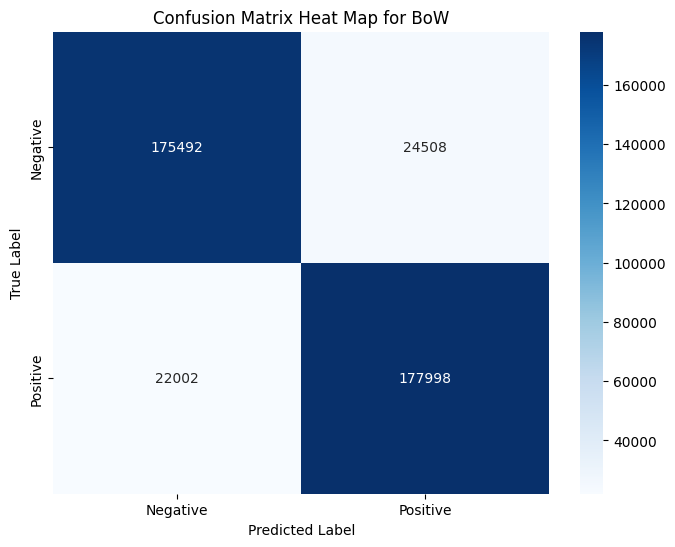

In [18]:
cm_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map for BoW')
plt.show()

### LR using TF-IDF

In [19]:
lr_tfidf = LogisticRegression(max_iter=X_train_tfidf.shape[0])
lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000000)

In [20]:
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

In [21]:
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Logistic Regression with TF-IDF Accuracy:", accuracy_tfidf)
print("Classification Report with TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

Logistic Regression with TF-IDF Accuracy: 0.8874125
Classification Report with TF-IDF:
              precision    recall  f1-score   support

           1       0.89      0.88      0.89    200000
           2       0.88      0.89      0.89    200000

    accuracy                           0.89    400000
   macro avg       0.89      0.89      0.89    400000
weighted avg       0.89      0.89      0.89    400000



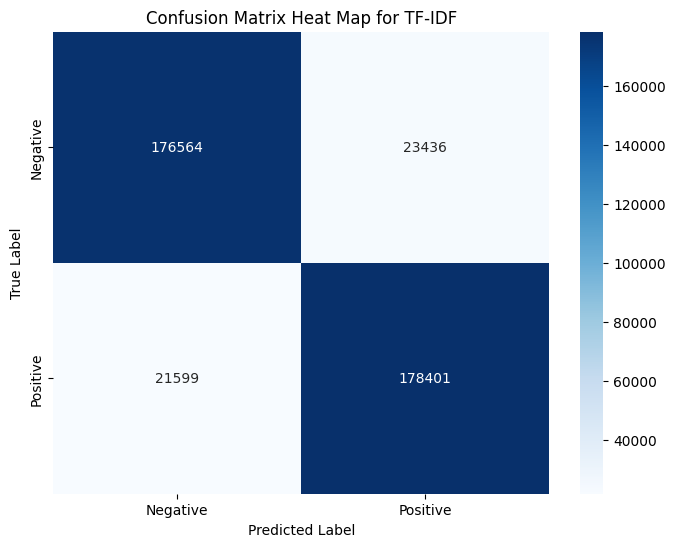

In [22]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map for TF-IDF')
plt.show()

### LR using Word2Vec

In [23]:
lr_word2vec = LogisticRegression(max_iter=X_train_word2vec.shape[0])
lr_word2vec.fit(X_train_word2vec, y_train)

LogisticRegression(max_iter=1000000)

In [24]:
y_pred_word2vec = lr_word2vec.predict(X_test_word2vec)

In [25]:
accuracy_word2vec = accuracy_score(y_test, y_pred_word2vec)
print("Logistic Regression with Word2Vec Accuracy:", accuracy_word2vec)
print("Classification Report with Word2Vec:")
print(classification_report(y_test, y_pred_word2vec))

Logistic Regression with Word2Vec Accuracy: 0.86993
Classification Report with Word2Vec:
              precision    recall  f1-score   support

           1       0.87      0.87      0.87    200000
           2       0.87      0.87      0.87    200000

    accuracy                           0.87    400000
   macro avg       0.87      0.87      0.87    400000
weighted avg       0.87      0.87      0.87    400000



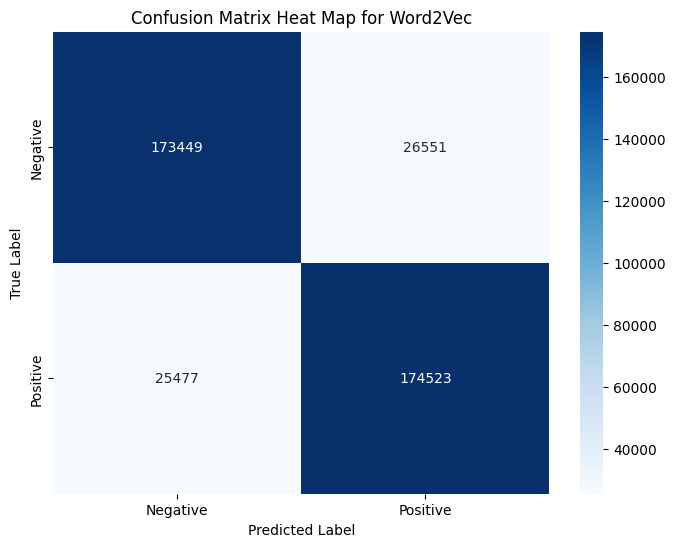

In [26]:
cm_word2vec = confusion_matrix(y_test, y_pred_word2vec)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_word2vec, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map for Word2Vec')
plt.show()

## Model Comparision

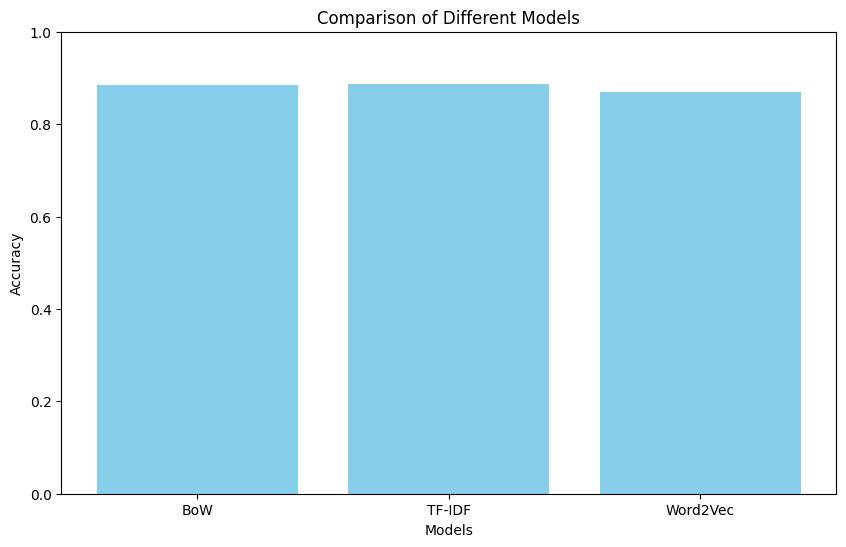

In [27]:
models = ['BoW', 'TF-IDF', 'Word2Vec']
accuracies = [accuracy_bow, accuracy_tfidf, accuracy_word2vec]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Models')
plt.ylim(0, 1)
plt.show()